# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

| Variable             | Description                                                                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Rescue_ID            | It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018 | 
| Date_TimeCaught      | Date the turtle is captured e.g. 06/01/ |2018                                                                                                                |
| Researcher           | Name of bycatch officer(s) involved with specific rescue                                                                                                   |
| Capture Site         | Area where turtle was captured, as reported by the fisher.                                                                                                 |
| Foraging Ground      | General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured.                               |
| Capture Method       | Fishing gear or method used by fishers to capture the turtle                                                                                               |
| Fisher               | Name of the fisher who captured the turtle                                                                                                                 |
| Landing_Site         | Section of beach where turtle is landed.                                                                                                                  |
| Species              | Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)                                                                                          |
| Tag_1                | Individual / unique number used to identify a turtle. Each turtle that is captured is tagged.                                                            |
| Tag_2                | Second tag added to large turtles. Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170                |
| Lost_Tags            | Replaced tags. If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number                              |
| T_Number             | It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment.                                                    |
| CCL_cm               | Central Carapace Length (Biometric measurement). Measured in centimetres                                                                                  |
| CCW_cm               | Central Carapace Width (Biometric measurement). Measured in centimetres                                                                                    |
| Weight_Kg            | (Biometric measurement). Measured in Kgs                                                                                                                   |
| Sex                  | Gender of the turtle.                                                                                                                                     |
| Turtle Characteristics | Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. Usually as short textual description                               |
| Status               | Indicates whether the turtle is released or admitted to TRC                                                                                                |
| Release Site         | Site where the turtle is released                                                                                                                          |
| Date_Release         | Date turtle is released                                                                                                                                    |
| Release_Admiss_Notes | Additional information about release                                                                                                                      |
| SpecialRemarks       | Additional info (General) about turtle                                                                                                                     |


Actions to take:

Date_TimeRelease: we don't need it, because it is not relevant to our target, too many missing values

datetime_caught
datetime_release
capturesite
foraging
landing site
capture number- target variable(?)
rescue id

 0   Rescue_ID              18062 non-null  object  nonnumerical, probably we won't use it, 
 1   Date_TimeCaught        18062 non-null  object  date time, we will use it, changed to date format, no missing values, skewed to the right, (done)
 2   Researcher             18062 non-null  object  nonnumerical, inbalecd more researcher 20, probably we don't need it, 
 3   CaptureSite            18062 non-null  object  categorical, inbalanced, high correlation, much more from 'other values', probably drop 'other values', normalize
 4   ForagingGround         18062 non-null  object  categorical, high correlation, inbalanced, much more from Creek, normalize
 5   CaptureMethod          18062 non-null  object  categorical, inbalanced, much more from 'net', probably we don't need it
 6   Fisher                 18062 non-null  object  categorical, probably we don't need it
 7   LandingSite            18062 non-null  object  categorical, high correlation,  much more of '8469', inbalanced 
 8   Species                18062 non-null  object  categorical, inbalanced, more of 5, probably we don't need it
 9   Tag_1                  17937 non-null  object  nonnumerical, don't need
 10  Tag_2                  4911 non-null   object  categorical, missing values, 
 11  Lost_Tags              925 non-null    object  nonnumerical, missing values (?), 
 12  T_Number               38 non-null     object  
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  Weight_Kg              12653 non-null  float64
 16  Sex                    13732 non-null  object 
 17  TurtleCharacteristics  18010 non-null  object 
 18  Status                 14429 non-null  object 
 19  ReleaseSite            17987 non-null  object 
 20  Date_TimeRelease       11954 non-null  object

## Set-up and Import

Terminal: 
'make setup'

In [801]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno



In [802]:
#! pip install ydata-profiling --upgrade

In [803]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [804]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [805]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [806]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


In [807]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


what is capture_number? how many captured turtles?

In [808]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


In [809]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [810]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


In [811]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

## Preprocessing

In [812]:
# make a profile report of all data
#profile = ProfileReport(df_train, minimal=False)
#profile.to_file("./data/output.html")

### Converting important columns to datetime



In [813]:
# Transform 'Date_TimeRelease' column to datetime format
df_train_date = df_train.copy()

# Transform 'Date_TimeRelease' column to string format
df_train_date['Date_TimeRelease'] = df_train_date['Date_TimeRelease'].astype(str)

# Replace / on date columns 
df_train_date['Date_TimeRelease'] = df_train_date['Date_TimeRelease'].str.replace('/', '-')

# Add '20' in years 

for i in range(len(df_train_date['Date_TimeRelease'])):
    d = df_train_date['Date_TimeRelease'][i]
    df_train_date['Date_TimeRelease'][i] = df_train_date['Date_TimeRelease'][i].replace(d, '20'+d)
 

df_train_date['Date_TimeRelease'].head(30)


0           2022-12-00
1           2028-10-01
2           2001-11-01
3           2011-03-02
4           2008-08-02
5           2010-08-02
6           2021-10-02
7           2021-10-02
8           2022-10-02
9                20nan
10    20ReleaseSite_50
11               20nan
12               20nan
13          20Released
14    20ReleaseSite_50
15    20ReleaseSite_62
16               20nan
17               20nan
18               20nan
19               20nan
20               20nan
21               20nan
22               20nan
23               20nan
24               20nan
25               20nan
26               20nan
27               20nan
28               20nan
29               20nan
Name: Date_TimeRelease, dtype: object

In [814]:
# Transform 'Date_TimeCaught' column to datetime format
df_train_date['Date_TimeCaught'] = pd.to_datetime(df_train_date['Date_TimeCaught'])

#create new columns for year and week of year, year_woy (year and week of year combined)
df_train_date["year"]=df_train_date.Date_TimeCaught.dt.year
df_train_date["week_of_year"]=df_train_date.Date_TimeCaught.dt.isocalendar().week
df_train_date["year_woy"]=df_train_date.year*100+df_train_date.week_of_year

In [815]:
df_train_date.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


In [816]:
# reset index?
df_train_date.reset_index(drop=True, inplace=True)


In [817]:
df_train_date.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


checking out other columns:

In [818]:
df_train_date['ForagingGround'].value_counts()

ForagingGround
Creek    11408
Ocean     6651
creek        3
Name: count, dtype: int64

In [819]:
# Foraging ground has Creek and creek, replace creek with Creek
df_train_date['ForagingGround'] = df_train_date['ForagingGround'].str.replace('creek', 'Creek')
df_train_date['ForagingGround'].value_counts()

ForagingGround
Creek    11411
Ocean     6651
Name: count, dtype: int64

### Checking for duplicates

In [820]:
# Check for duplicates
df_train_date.duplicated().any(), df_capturesite_category.duplicated().any(), df_sample_sub.duplicated().any()

(False, False, False)

good, no duplicates! :)

### Checking missing values

In [821]:
# Check for missing values: overview
df_train_date.isnull().sum().any(), df_capturesite_category.isnull().sum().any(), df_sample_sub.isnull().sum().any()

(True, False, False)

In [822]:
# closer look into df_train_date
df_train_date.isna().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                      125
Tag_2                    13151
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       52
Status                    3633
ReleaseSite                 75
Date_TimeRelease             0
year                         0
week_of_year                 0
year_woy                     0
dtype: int64

<Axes: >

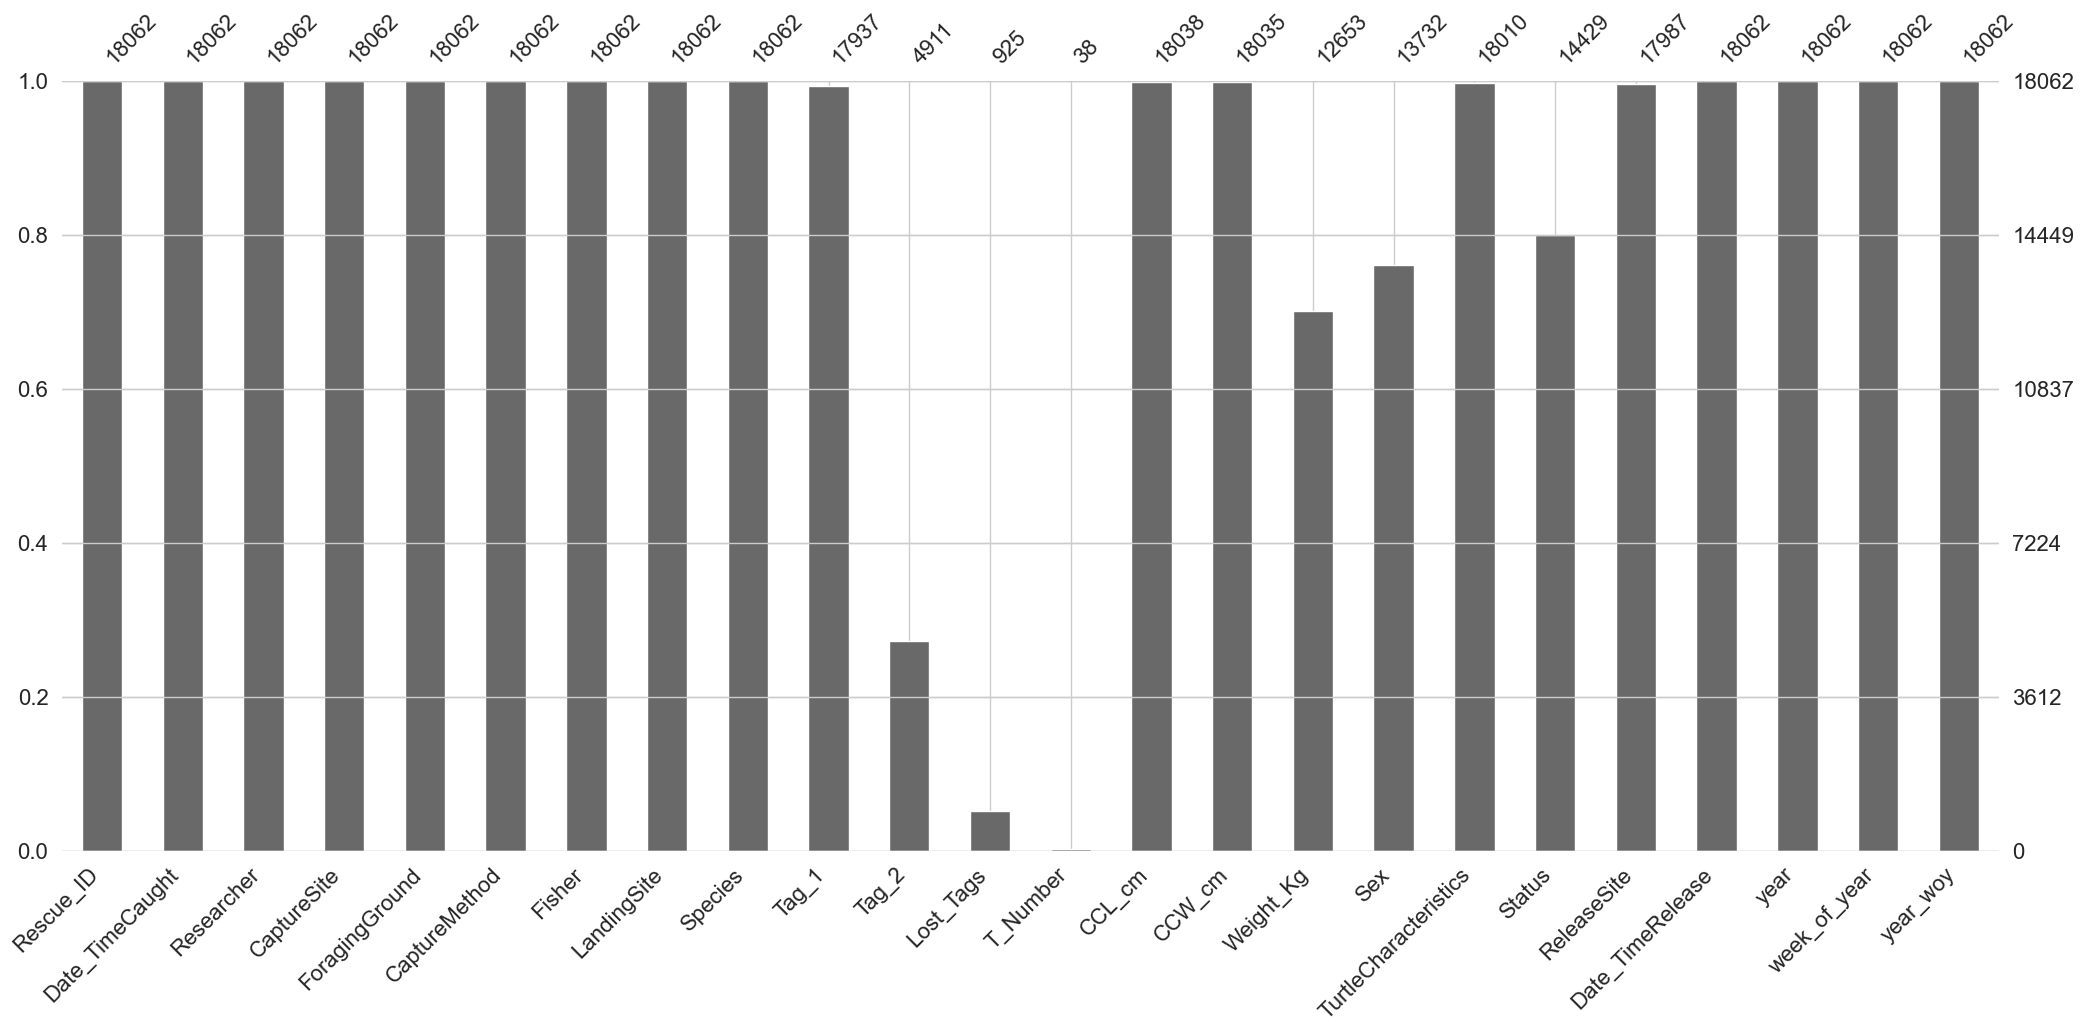

In [823]:
# plotting percentage of missing values per column
msno.bar(df_train_date)

<Axes: >

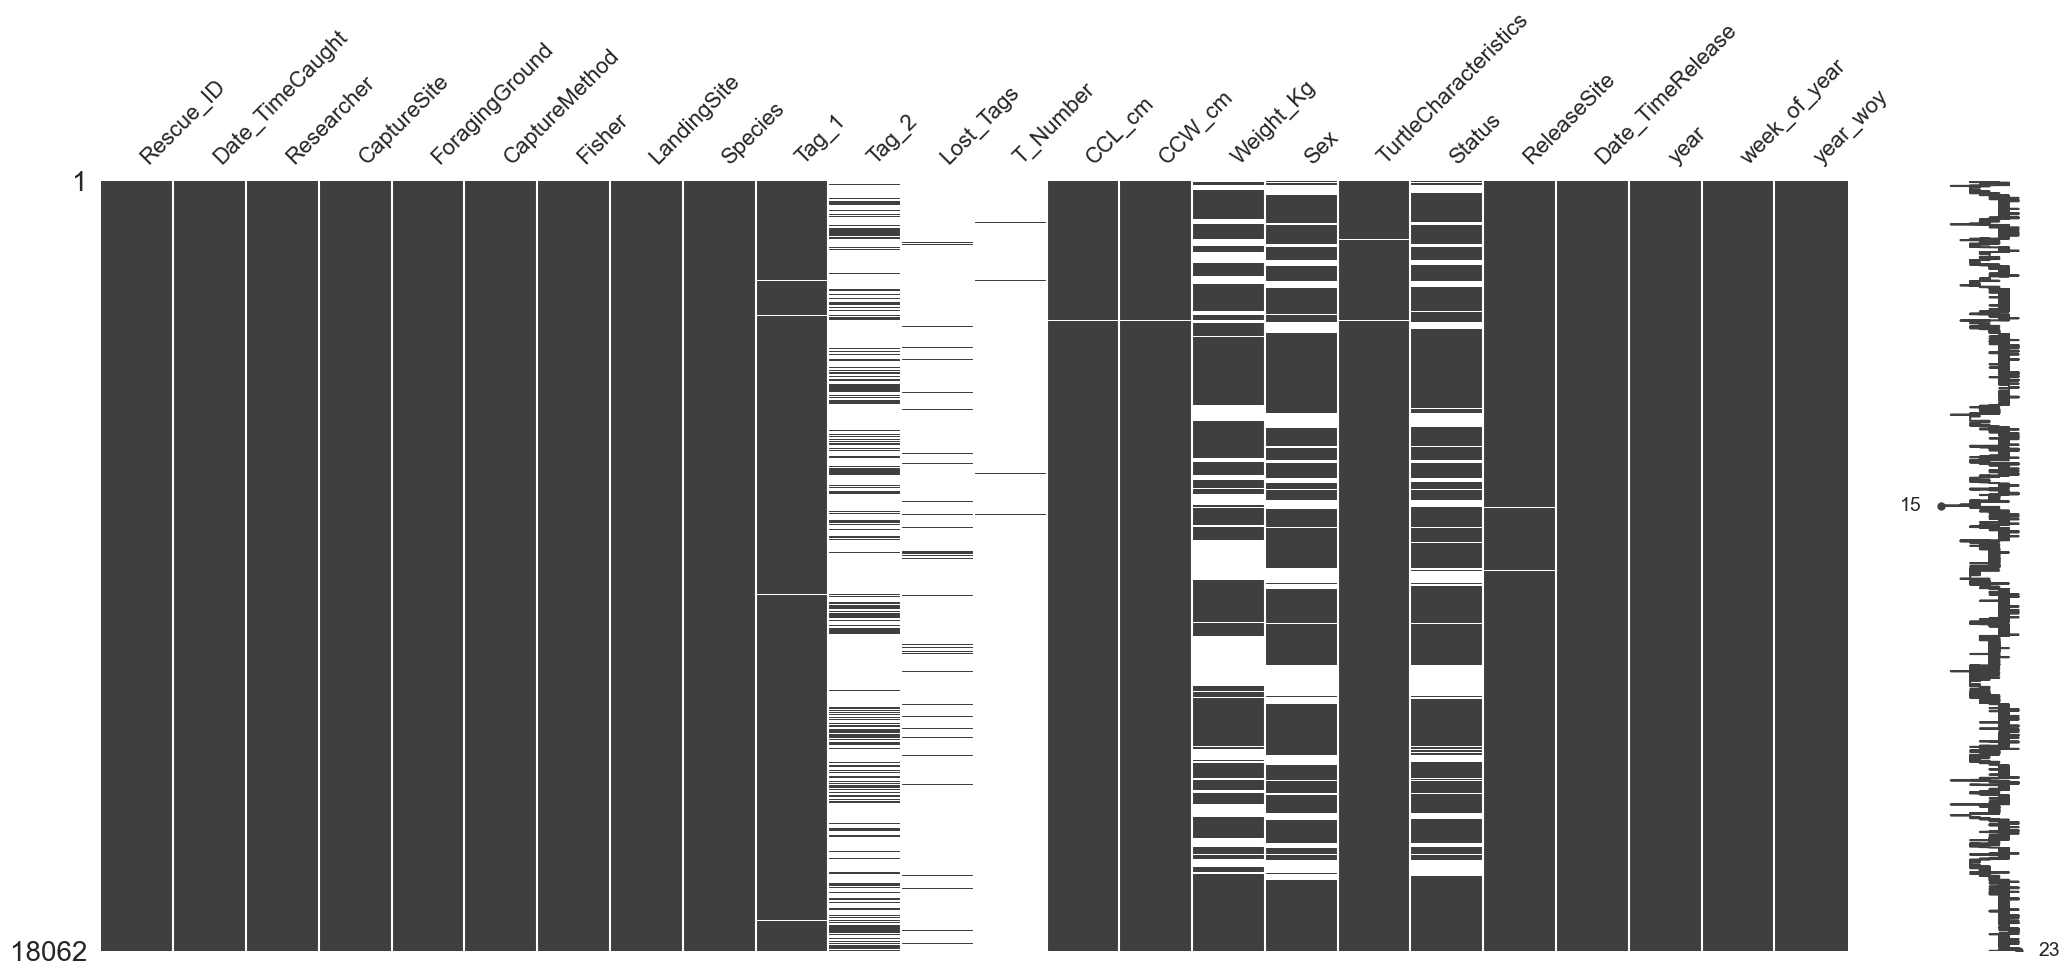

In [824]:
msno.matrix(df_train_date)

We can see that we have a lot of missing values in columns. How important are these for our objective? Which ones can we drop?
- Colum T_Number has only 38 non-null values, so we can drop it
- Colum Lost_Tags has only 925 non-null values, so we can drop it
- Colum Tag_2 has only 4911 non-null values, so we can drop it


In [825]:
# dropping columns 
df_train_date = df_train_date.drop(['T_Number', 'Lost_Tags', 'Tag_2'], axis=1)

### Filling missing values

The columns we fill in, we don't use in the model. 
Pay attention to fill in the missing values of columns we want to use, after we split the data into train and test.

In [826]:
df_train_date.Weight_Kg.describe()

count    12653.000000
mean         9.850731
std          9.737378
min          0.020000
25%          5.000000
50%          7.500000
75%         10.800000
max        140.000000
Name: Weight_Kg, dtype: float64

In [827]:
#we have an outlier, so lets use the median to fill the missing values
df_train_date.Weight_Kg.fillna(df_train_date.Weight_Kg.median(), inplace=True)

In [828]:
df_train_date.Sex.value_counts()

Sex
Unknown         13578
Female            113
Male               39
Not_Recorded        2
Name: count, dtype: int64

In [829]:
#fill missing values of Sex with Unknown
df_train_date.Sex.fillna('Unknown', inplace=True)
df_train_date.Sex.value_counts()

Sex
Unknown         17908
Female            113
Male               39
Not_Recorded        2
Name: count, dtype: int64

In [830]:
df_train_date['Status'].value_counts()

Status
Released                                          13610
Admitted                                            292
Not_Recorded                                         28
 shell is beginning to flake                          7
 green algae on carapace                              7
                                                  ...  
 barnacles on plastron (removed)                      1
 notches on RMS                                       1
 small barnacles around neck and rear flippers        1
 5 RLS                                                1
 barnacles on plastron                                1
Name: count, Length: 439, dtype: int64

In [831]:
df_train_date.Status.fillna('Not_Recorded', inplace=True)

In [832]:
df_train_date.ReleaseSite.fillna('Unknown', inplace=True)

In [833]:
df_train_date.TurtleCharacteristics.fillna('Unknown', inplace=True)

In [834]:
df_train_date.isna().sum().sort_values(ascending=False)

Tag_1                    125
CCW_cm                    27
CCL_cm                    24
week_of_year               0
year                       0
Date_TimeRelease           0
ReleaseSite                0
Status                     0
TurtleCharacteristics      0
Sex                        0
Weight_Kg                  0
Rescue_ID                  0
Date_TimeCaught            0
Species                    0
LandingSite                0
Fisher                     0
CaptureMethod              0
ForagingGround             0
CaptureSite                0
Researcher                 0
year_woy                   0
dtype: int64

In [835]:
df_train_date.Tag_1.value_counts()

Tag_1
KES1306    116
4858        90
KE6133      81
KE8098      81
KE7799      75
          ... 
KE7211       1
KE7014       1
KE7007       1
KE6535       1
KES1833      1
Name: count, Length: 8235, dtype: int64

In [836]:
# how to fill in missing values for Tag_1? answer: use the most frequent value? or use the most frequent value per year?
df_train_date.Tag_1.fillna('NotTagged', inplace=True)

In [837]:
# how to fill in for CCL_cm and CCW_cm? check median by species?
print(df_train_date.groupby('Species').CCL_cm.median())

print(df_train_date.groupby('Species').CCW_cm.median())


Species
Species_0    48.50
Species_1    60.55
Species_2    43.85
Species_3    38.50
Species_4    85.10
Species_5    43.90
Species_6    35.70
Species_7    52.10
Name: CCL_cm, dtype: float64
Species
Species_0    45.20
Species_1    43.25
Species_2    43.55
Species_3    35.80
Species_4    78.95
Species_5    41.80
Species_6    33.20
Species_7    54.90
Name: CCW_cm, dtype: float64


In [838]:
#then fill in missing values with median per species
df_train_date.CCL_cm.fillna(df_train_date.groupby('Species').CCL_cm.transform('median'), inplace=True)
df_train_date.CCW_cm.fillna(df_train_date.groupby('Species').CCW_cm.transform('median'), inplace=True)

<Axes: >

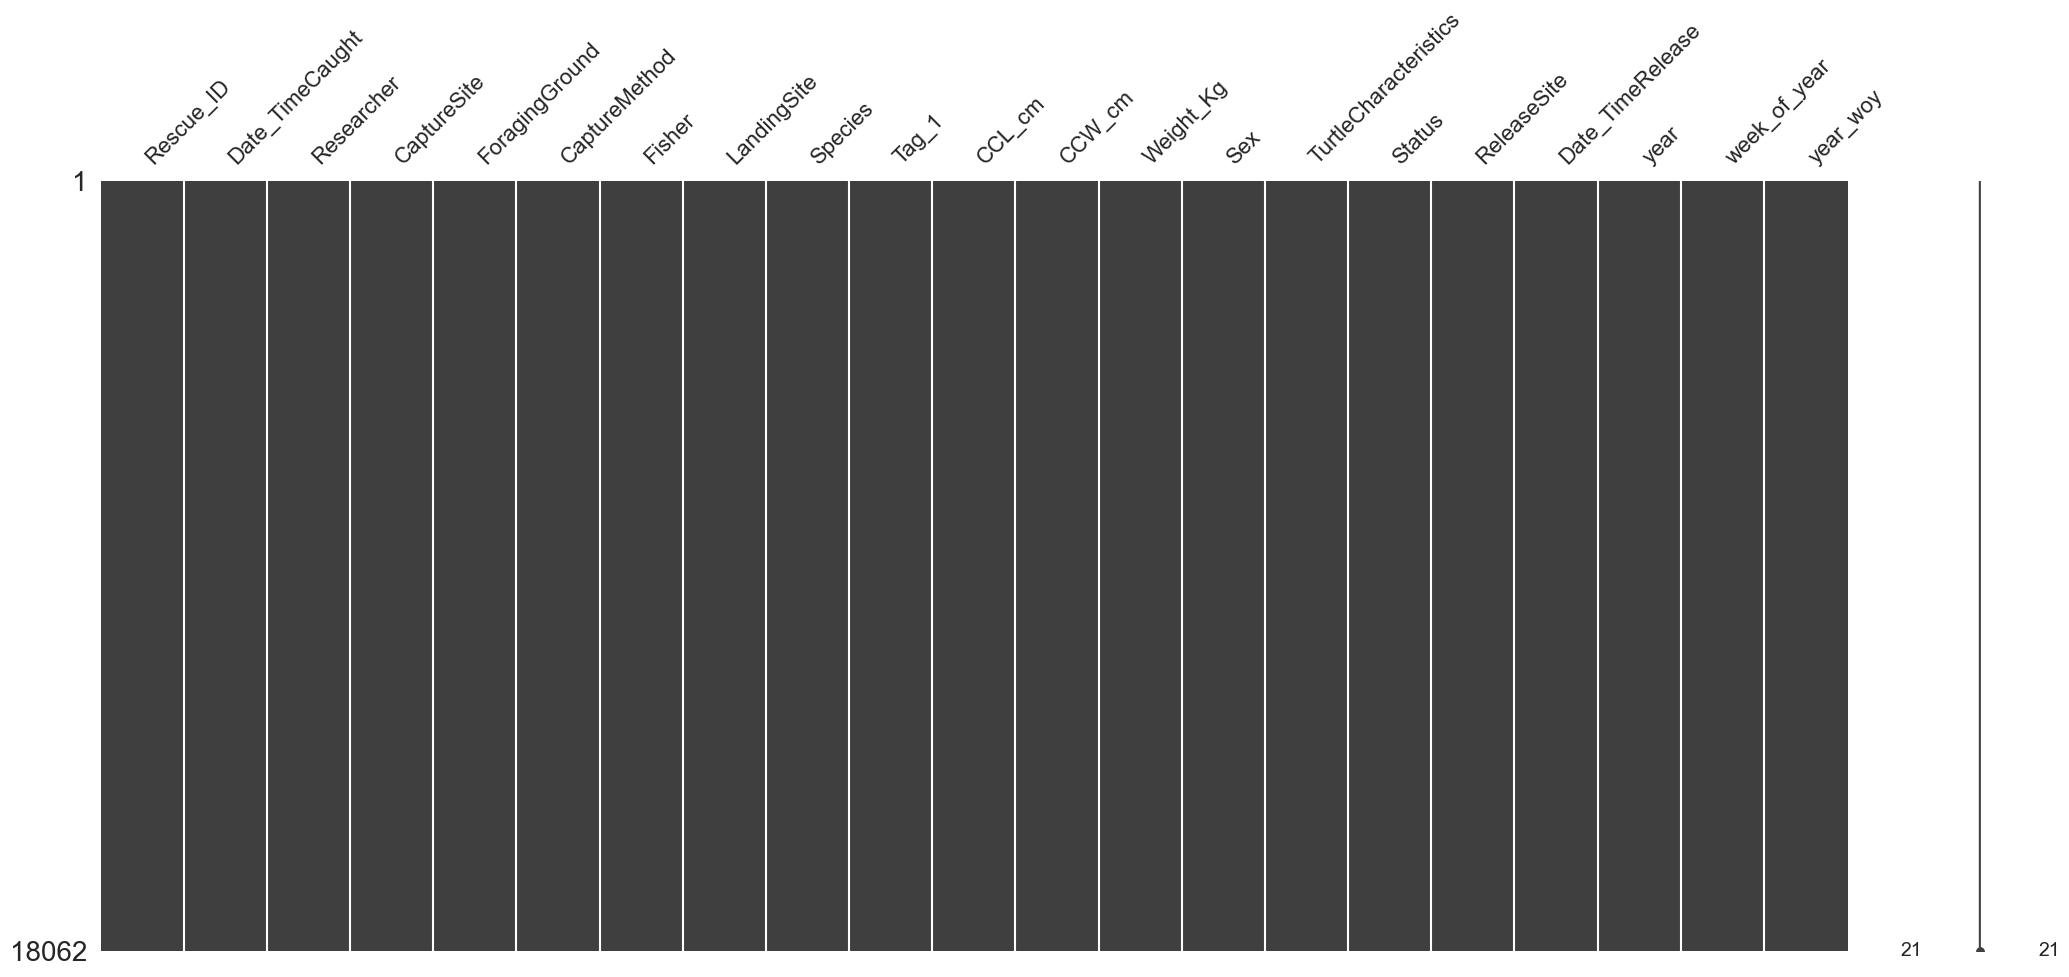

In [839]:
msno.matrix(df_train_date)

In [840]:
# profile?

### Combining our cleaned tables together for modeling

In [841]:
df_train_date.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,7.5,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,7.5,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,7.5,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,7.5,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,7.5,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


In [842]:
df = df_train_date.copy()

In [843]:
# groupby year/ capture site  
df.groupby(['year', 'week_of_year', 'CaptureSite', 'LandingSite']) 

df.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,7.5,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,7.5,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,7.5,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,7.5,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,7.5,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


In [844]:
df.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',
       'year', 'week_of_year', 'year_woy'],
      dtype='object')

In [845]:
# check if it is dataframe
type(df)

pandas.core.frame.DataFrame

In [846]:
df.drop(['Rescue_ID', 'Researcher', 'CaptureMethod', 'Fisher', 'Species',
       'Tag_1', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease'], axis=1, inplace=True)

In [847]:
df.head()


,Date_TimeCaught,CaptureSite,ForagingGround,LandingSite,Status,year,week_of_year,year_woy
0,2000-12-22,CaptureSite_0,Ocean,LandingSite_CaptureSiteCategory_2,Released,2000,51,200051
1,2001-10-28,CaptureSite_0,Ocean,LandingSite_CaptureSiteCategory_2,Released,2001,43,200143
2,2001-11-01,CaptureSite_0,Ocean,LandingSite_CaptureSiteCategory_2,Released,2001,44,200144
3,2002-03-11,CaptureSite_0,Ocean,LandingSite_CaptureSiteCategory_2,Released,2002,11,200211
4,2002-08-08,CaptureSite_0,Ocean,LandingSite_CaptureSiteCategory_2,Released,2002,32,200232


Reminder: objective: we want to find Number of Turtlers per week per Capture site

In [848]:
# we have to create a target column: Number_Turtles per week per capturesite
df.groupby(['year_woy', 'year', 'week_of_year', 'CaptureSite']).count()


Date_TimeCaught  ForagingGround   
year_woy year week_of_year CaptureSite                                       
199816   1998 16           CaptureSite_27                1               1  \
199828   1998 28           CaptureSite_11                1               1   
199832   1998 32           CaptureSite_11                1               1   
                           CaptureSite_27                1               1   
199839   1998 39           CaptureSite_11                2               2   
...                                                    ...             ...   
201852   2018 52           CaptureSite_23                1               1   
                           CaptureSite_25                4               4   
                           CaptureSite_3                 1               1   
                           CaptureSite_7                 1               1   
                           CaptureSite_9                 3               3   

                                           LandingSite  Status  
year_woy year week_of_year CaptureSite                          
199816   1998 16           CaptureSite_27            1       1  
199828   1998 28           CaptureSite_11            1       1  
199832   1998 32           CaptureSite_11            1       1  
                           CaptureSite_27            1       1  
199839   1998 39           CaptureSite_11            2       2  
...                                                ...     ...  
201852   2018 52           CaptureSite_23            1       1  
                           CaptureSite_25            4       4  
                           CaptureSite_3             1       1  
                           CaptureSite_7             1       1  
                           CaptureSite_9             3       3  

[7957 rows x 4 columns]

In [849]:
#define target column
df_target = df.groupby(['year', 'week_of_year','CaptureSite']).count()
df_target['Number_Turtles'] = df_target['Date_TimeCaught']
df_target.drop(['Date_TimeCaught', 'year_woy', 'ForagingGround', 'LandingSite', 'Status'], axis=1, inplace=True)

# Resetting the index to bring 'Category' back as a column
df_target = df_target.reset_index()

print(df_target)


      year  week_of_year     CaptureSite  Number_Turtles
0     1998            16  CaptureSite_27               1
1     1998            28  CaptureSite_11               1
2     1998            32  CaptureSite_11               1
3     1998            32  CaptureSite_27               1
4     1998            39  CaptureSite_11               2
...    ...           ...             ...             ...
7952  2018            52  CaptureSite_23               1
7953  2018            52  CaptureSite_25               4
7954  2018            52   CaptureSite_3               1
7955  2018            52   CaptureSite_7               1
7956  2018            52   CaptureSite_9               3

[7957 rows x 4 columns]


In [850]:
## this is our final table fro modelling!
df_target.head()

,year,week_of_year,CaptureSite,Number_Turtles
0,1998,16,CaptureSite_27,1
1,1998,28,CaptureSite_11,1
2,1998,32,CaptureSite_11,1
3,1998,32,CaptureSite_27,1
4,1998,39,CaptureSite_11,2


In [851]:
df_target.dtypes

year               int32
week_of_year      UInt32
CaptureSite       object
Number_Turtles     int64
dtype: object

In [852]:
df_target.CaptureSite.astype('str')


0       CaptureSite_27
1       CaptureSite_11
2       CaptureSite_11
3       CaptureSite_27
4       CaptureSite_11
             ...      
7952    CaptureSite_23
7953    CaptureSite_25
7954     CaptureSite_3
7955     CaptureSite_7
7956     CaptureSite_9
Name: CaptureSite, Length: 7957, dtype: object

In [853]:
df_target["CaptureSite"] = df_target["CaptureSite"].str.split(pat = "_", expand=True)[1]

In [854]:
df_target.CaptureSite = df_target.CaptureSite.astype('int')

In [855]:
df_target.dtypes

year               int32
week_of_year      UInt32
CaptureSite        int64
Number_Turtles     int64
dtype: object

In [856]:
df_target.head()

,year,week_of_year,CaptureSite,Number_Turtles
0,1998,16,27,1
1,1998,28,11,1
2,1998,32,11,1
3,1998,32,27,1
4,1998,39,11,2


In [857]:
# transform those categories and types to numerical values
#df_target["year_woy"] = df_target["year_woy"].str.split(pat = "_", expand=True)[1]


In [858]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            7957 non-null   int32 
 1   week_of_year    7957 non-null   UInt32
 2   CaptureSite     7957 non-null   int64 
 3   Number_Turtles  7957 non-null   int64 
dtypes: UInt32(1), int32(1), int64(2)
memory usage: 194.4 KB


### Visualization

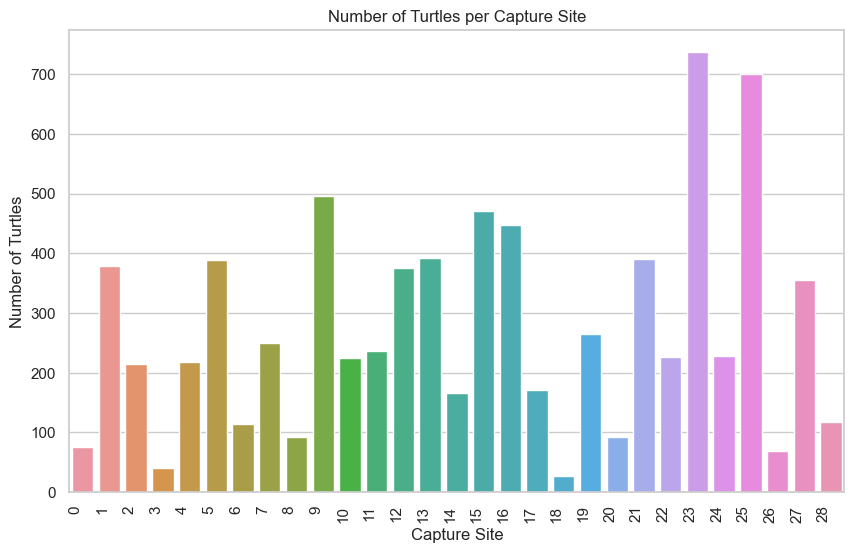

In [859]:
#plot the count correlation between Number_Turtles and CaptureSite
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_target is your DataFrame and 'CaptureSite' is a column in it
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plot = sns.countplot(x=df_target['CaptureSite'], data=df_target)

# Set x-axis tick labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")

# Add labels and a title
plot.set_xlabel('Capture Site')
plot.set_ylabel('Number of Turtles')
plot.set_title('Number of Turtles per Capture Site')

# Rotate the entire plot by 90 degrees
#plt.gca().invert_yaxis()  # Invert the y-axis to make the plot read from top to bottom
#plt.tight_layout()  # Adjust layout

plt.show()


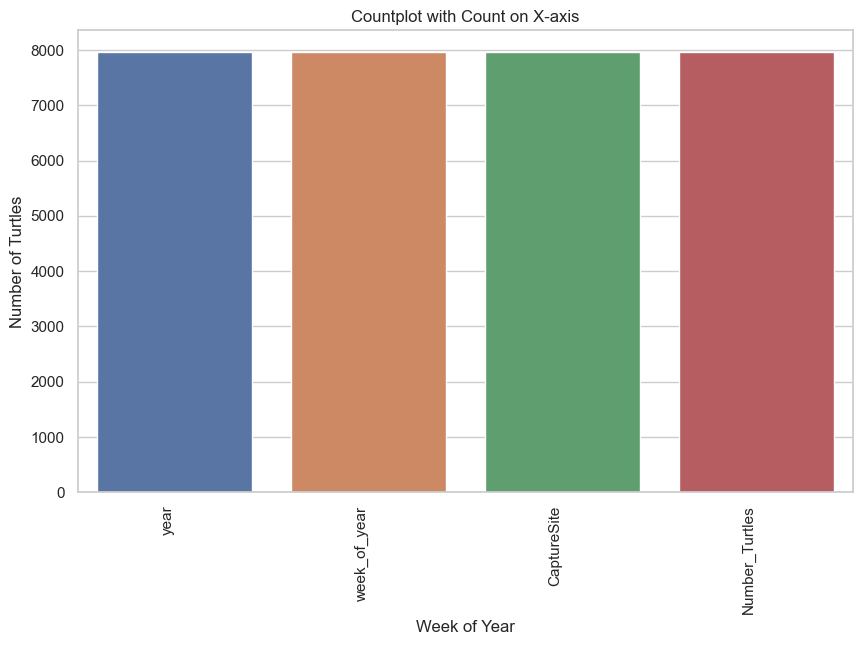

In [860]:
#plot the count correlation between Number_Turtles and CaptureSite
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_target is your DataFrame and 'CaptureSite' is a column in it
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plot = sns.countplot(df_target)
# Calculate the count of each category
#value_counts = df_target.value_counts() #value counts counts the number of occurences of each value in the column
#print(value_counts)

# Set the count values as x-axis tick labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right") 

# Add labels and a title
plot.set_xlabel('Week of Year')
plot.set_ylabel('Number of Turtles')
plot.set_title('Countplot with Count on X-axis')


plt.show()

In [861]:
# make a histogram in 

In [862]:
# convert capturesite to string

---

## Splitting data for testing 

In [863]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [864]:
df_target.head()

,year,week_of_year,CaptureSite,Number_Turtles
0,1998,16,27,1
1,1998,28,11,1
2,1998,32,11,1
3,1998,32,27,1
4,1998,39,11,2


In [865]:
#df_target['year'] = pd.to_datetime(df_target['year'], format='%Y')
#change for week using isocalendar
#df_target['week_of_year'] = pd.to_datetime(df_target['week_of_year'], format='%W')

In [866]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            7957 non-null   int32 
 1   week_of_year    7957 non-null   UInt32
 2   CaptureSite     7957 non-null   int64 
 3   Number_Turtles  7957 non-null   int64 
dtypes: UInt32(1), int32(1), int64(2)
memory usage: 194.4 KB


### Splitting data into train and test sets

In [867]:
X = df_target.drop(['Number_Turtles'], axis=1)
Y = df_target['Number_Turtles']

##### creating dummy variables

In [868]:
# TODO: One-hot encode the 'features' data using pandas.get_dummies()
X = pd.get_dummies(X)

# Print the number of features after one-hot encoding
encoded = list(X.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

3 total features after one-hot encoding.


In [869]:
print(X)

      year  week_of_year  CaptureSite
0     1998            16           27
1     1998            28           11
2     1998            32           11
3     1998            32           27
4     1998            39           11
...    ...           ...          ...
7952  2018            52           23
7953  2018            52           25
7954  2018            52            3
7955  2018            52            7
7956  2018            52            9

[7957 rows x 3 columns]


In [870]:
#Y_column = df_target[Number_Turtles]

# Reset the index of Y_column
#Y_column = Y_column.reset_index(drop=True)

In [871]:
print(Y)

0       1
1       1
2       1
3       1
4       2
       ..
7952    1
7953    4
7954    1
7955    1
7956    3
Name: Number_Turtles, Length: 7957, dtype: int64


In [872]:
#make array of Y
Y = np.array(Y)


In [873]:
print(Y)

[1 1 1 ... 1 1 3]


In [875]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [876]:
X_train.shape

(6365, 3)

## Training the Baseline model: DummyRegressor

In [877]:
## in order to exemplify how the predict will work.. we will save the y_train
#X_test.to_csv("data/X_test.csv")
#y_test.to_csv("data/y_test.csv")

In [896]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)
y_pred1 = dummy_mean.predict(X_test)

print('Dummy Regressor root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred1, squared=False)))

Dummy Regressor root mean squared error: 2.20


#### Baseline model2: DummyClassifier

In [897]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)


print('Dummy Classifier root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred, squared=False)))
#print("Confusion Matrix: \n", confusion_matrix(y_test, dummy_clf.predict(X_test)))

# Calculate the R-squared for our model. R-squared is a goodness-of-fit measure for linear regression models.
dummy_clf.score(X, Y)


Dummy Classifier root mean squared error: 2.56


0.5197938921704159

## Training model: Linear Regression

In [899]:
#train model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred3 = linreg.predict(X_test)
print('Linear Regression root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred3, squared=False)))

Linear Regression root mean squared error: 2.16


### Logistic Regression

In [900]:
#train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred4 = logreg.predict(X_test)
print('Logistic Regression root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred4, squared=False)))

Logistic Regression root mean squared error: 2.56


In [ ]:
"""# Feature Importance plot
# Dataframe to store feature importance
feature_importance_df = pd.DataFrame()

# Append feature importance per fold
fold_importance_df = pd.DataFrame({'feature': X_train.columns.tolist(), 'importance': model.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

sns.set_style('whitegrid')
fi = feature_importance_df.groupby('feature')['importance'].mean()
fi.sort_values(ascending=False)[:10][::-1].plot(kind = 'barh', figsize=(10, 8), title = 'Top 10 Important Features')
plt.show()"""

In [ ]:
#Random Forest

In [ ]:
#switch to datetime format?